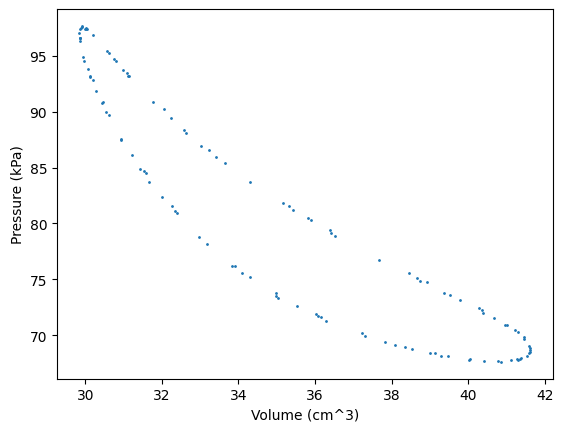

In [19]:
# Load data in dfs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

df_1 = pd.read_csv("run1.csv", header=0, 
                   names=["time", "angle", "volume", "pressure","temp1", "temp2"])

time = df_1["time"] # ms
radians = df_1["angle"]
volume = df_1["volume"]
pressure = df_1["pressure"] # kPa
temp1 = df_1["temp1"] # C
temp2 = df_1["temp2"] # C

plt.scatter(volume, pressure, s=1)
plt.xlabel("Volume (cm^3)")
plt.ylabel("Pressure (kPa)")
plt.show()

# Finding Efficiency of Motor
The equation for the work done in the system can be found as:
$$W = - \int_{V_i}^{V_f}P(V)dV$$
Where the equation for pressure is:
$$P = \frac{nRT}{V}$$
Meaning work can be written as:
$$W = - nRT \int_{V_i}^{V_f} \frac{dV}{V}$$
$$W = nRT(ln(\frac{V_i}{V_f}))$$
When considering changes in temperature, the equation becomes:
$$\Delta W = nR(T_i - T_f)ln(V_i/V_f)$$
The efficiency of the system can be found as:
$$\eta = \frac{T_f - T_i}{T_f + \frac{C_V (T_f - T_i)}{nR ln(V_f/V_i)}}$$
Where $C_V$ is:
$$C_V = \frac{nRf}{2}$$
Meaning $\eta$ can be rewritten as:
$$\eta = \frac{T_f - T_i}{T_f + \frac{f}{2}\frac{T_f - T_i}{ln(V_f/V_i)}}$$

In [ ]:
def work(v_i, v_f, p_i, p_f, t_i, t_f):
    R = 8.314
    n_i = (p_i * v_i) / (R * t_i)
    n_f = (p_f * v_f) / (R * t_f)
    avg_n = (n_i + n_f)/2
    delta_T = t_i - t_f
    delta_w = avg_n * R * delta_T * np.log(v_i/v_f)
    print(f"n is roughly {avg_n:.2e} mols")
    return delta_w

def pressure(v, T, n):
    R = 8.314
    pressure = (n * R * T)/v
    return pressure

In [22]:
R = 8.314

# kPa -> Pa
p_i = max(pressure) * 1000
p_f = min(pressure) * 1000

index_i = pressure.idxmax()
index_f = pressure.idxmin()

# cm^3 -> m^3
v_i = volume.loc[index_i] / 1000000
v_f = volume.loc[index_f] / 1000000

# C -> K
t1_i = temp1.loc[index_i] + 273.15
t1_f = temp1.loc[index_f] + 273.15

t2_i = temp2.loc[index_i] + 273.15
t2_f = temp2.loc[index_f] + 273.15

print(index_i, index_f)
print(f'Max pressure: {p_i:.2f} Pa, Volume: {v_i:.2e} m^3')
print(f"Temp1: {t1_i:.2f} K")
print(f"Temp2: {t2_i:.2f} K")
print(f'Min pressure: {p_f:.2f} Pa, Volume: {v_f:.2e} m^3')
print(f"Temp1: {t1_f:.2f} K")
print(f"Temp2: {t2_f:.2f} K")

delta_w = work(v_i, v_f, p_i, p_f, t1_i, t1_f)
print(f'{delta_w:.2e}')

2 112
Max pressure: 97663.57 Pa, Volume: 2.99e-05 m^3
Temp1: 454.90 K
Temp2: 313.40 K
Min pressure: 67622.07 Pa, Volume: 4.09e-05 m^3
Temp1: 455.40 K
Temp2: 313.15 K
n is roughly 7.51e-04 mols
9.73e-04


Text(0, 0.5, 'Pressure (kPa)')

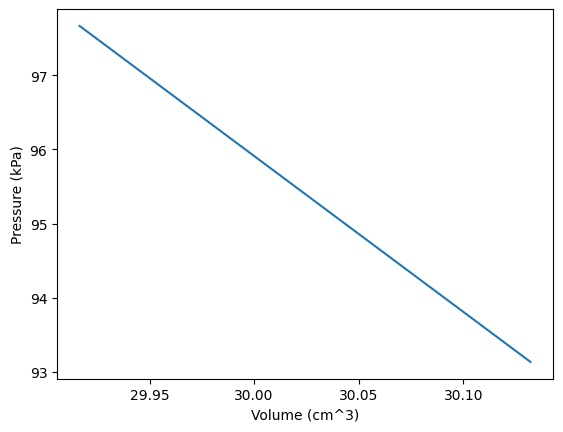

In [ ]:
# Finding lower and higher regions to fit curve
lower_region = df_1[3]
lower_pressure = lower_region['pressure']
lower_volume = lower_region['volume']

plt.plot(lower_volume, lower_pressure)
plt.xlabel("Volume (cm^3)")
plt.ylabel("Pressure (kPa)")